Data cleaning, visulalization and feature engineering

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv('train.csv', header=0)
df_test = pd.read_csv('test.csv', header=0)

df_0 = df.copy()
df_test_0 = df_test.copy()

In [2]:
df_test.info()
# df_test.head(40)
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


/home/mehdi/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,NaN,0.000000,0.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,0.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


I observe that the variables Ticket and Cabin PassengeId, Name and Embarcation are irrelevant, therefore I drop them.


In [ ]:
df = df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name', 'Embarked'], axis=1)
df_test = df_test.drop(['Cabin', 'Ticket', 'PassengerId', 'Name', 'Embarked'], axis=1)

I change the sex and Embarked into numerical variable

In [ ]:
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df = df.drop(['Sex'], axis=1)
# df.head(5)

df_test['Gender'] = df_test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df_test = df_test.drop(['Sex'], axis=1)

Sum Parch and SibSP into Familiy size
Remove Family size

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp', 'Parch'], axis=1)
# df.head(5)

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test = df_test.drop(['SibSp', 'Parch'], axis=1)

Filling the missing ages

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f90d8f842e8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f90d8f026a0>], dtype=object)

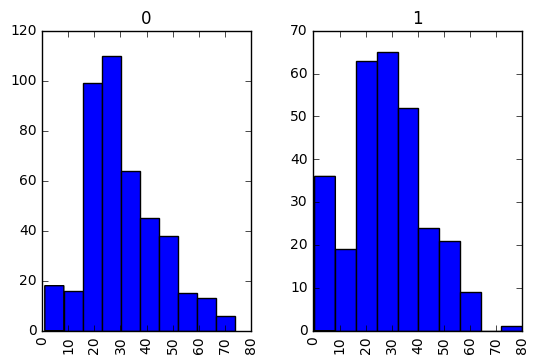

In [32]:
df_0['Age'].hist(by=df_0['Survived'], stacked=True)

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
6,54.0,0
7,2.0,0
8,27.0,1
9,14.0,1
10,4.0,1


In [ ]:
import numpy as np

median_ages = np.zeros((2, 3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median()
df['AgeFill'] = df['Age']
df_test['AgeFill'] = df_test['Age']

for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1),'AgeFill'] = median_ages[i, j]
        df_test.loc[ (df_test.Age.isnull()) & (df_test.Gender == i) & (df_test.Pclass == j+1),'AgeFill'] = median_ages[i, j]
# df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

In [ ]:
df = df.drop(['Age'], axis=1)

df_test = df_test.drop(['Age'], axis=1)

In [ ]:
df.info()
median_ages

Filling the missing fare in the test set

In [ ]:
df_test['FareFill'] = df_test['Fare']
df['FareFill'] = df['Fare']

Fare_median = df_test['FareFill'].dropna().median()
df_test.loc[df_test.Fare.isnull(), ['FareFill']] = Fare_median

df_test = df_test.drop(['Fare'], axis=1)
df = df.drop(['Fare'], axis=1)

df_test.info()
df.info()

We add the age class feature

In [ ]:
df['Age*Class'] = df.AgeFill * df.Pclass
df_test['Age*Class'] = df_test.AgeFill * df_test.Pclass
df_test.head(5)

In [ ]:
# df.dtypes
train_data = df.values
test_data = df_test.values
X_train = train_data[0::, 1::]
X_test = test_data[0::, 0::]
Y = train_data[0::, 0]
# train_data

Random forest

Split train into train and crossval

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X_train, Y, test_size=0.1, random_state=0)

Classification algorithms

In [ ]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 

# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 100)

# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(train_data[0::, 1::], train_data[0::, 0])

# Take the same decision trees and run it on the test data
output = forest.predict(test_data[0::, 0::])

# Score is 0.70

In [ ]:
# Logistic regression basic

from sklearn import linear_model

clf = linear_model.LogisticRegression(C=1e5)
clf = clf.fit(X_train, Y)
output = clf.predict(X_test)

# Score is 0.75

Let's ttry to improve the performance of the algorithm'

In [ ]:
# Weight modification

from sklearn import linear_model

clf = linear_model.LogisticRegression(C=1e5, class_weight='balanced')
clf = clf.fit(X_train, Y)
output = clf.predict(X_test)

# Score is 0.71

Analyse data, let's check the covariance between the survivors and the features

In [ ]:
from sklearn import preprocessing
train_data_scaled = preprocessing.scale(train_data)
np.cov(np.transpose(train_data_scaled))[0, :]

In [ ]:
df.axes

Plot

In [ ]:
import matplotlib.pyplot as plt
df.boxplot()

In [ ]:
df.hist()

In [ ]:
df.plot(kind='density',  sharex=False, subplots=True,  layout=(3,3))

No big variance in FareFill, twice more 3rd class than each other class, gaussian age.
40% survived.

In [ ]:
plt.style.use('ggplot')
df.groupby('Survived').hist()

In [ ]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

The 1st and 2nd class were closer from the boats le's analyse these classes

In [ ]:
plt.style.use('ggplot')
df.groupby('Pclass').hist()

Women and children were given priority, let's merge them into a class

In [ ]:
# Merging women and children into one class
# df.loc[((df['Gender'] == 0) | (df['AgeFill'] < 20.)) & (df['Pclass'] == 1 ) ].hist()
#df.loc[(df['Gender'] == 0) & (df['Pclass'] < 2 ) ].hist()
df.loc[(df['AgeFill'] < 10) & (df['Pclass'] < 2 ) ].hist()

In [ ]:
import matplotlib.pyplot as plt
df.plot(x='AgeFill', y='Survived', kind='scatter')
plt.show()

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
    hidden_layer_sizes=(4), random_state=1)

nn.fit(X_train, Y)
output = nn.predict(X_test)

# Score 0.73

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
kmeans.labels_
y_pred_train = kmeans.predict(X_train)

from sklearn.metrics import accuracy_score
accuracy_score(Y, y_pred_train)
kmeans.cluster_centers_

We analyse the confusion matrix
Therefore, we split the train into train and validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train_0, X_val, Y_train_0, Y_val = train_test_split(X_train, Y, test_size=0.1, random_state=11)

In [ ]:
# Logistic regression basic

from sklearn import linear_model

clf = linear_model.LogisticRegression(C=1e5)
clf = clf.fit(X_train_0, Y_train_0)
output = clf.predict(X_val)

# Score is 0.75

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred=output, y_true=Y_val)

Most people who died are well classified, however 30% of the alive people are wrongly classified.

Let's try to set the best hyperparameter for the logistic regression

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

X_train_0, X_val, Y_train_0, Y_val = train_test_split(X_train, Y, test_size=0.1, random_state=np.random.randint(40))

for i in range(0,10):
    clf = linear_model.LogisticRegression(C=pow(10, -i + 5))
    clf = clf.fit(X_train_0, Y_train_0)
    output = clf.predict(X_val)
    print(i)
    print(accuracy_score(y_pred=output, y_true=Y_val))

The best C is for i from 0 to 4

In [ ]:
clf = linear_model.LogisticRegression(C=1)
clf = clf.fit(X_train, Y)
output = clf.predict(X_test)

# 0.76

Let's check again the confusion matrix of the random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train_0, X_val, Y_train_0, Y_val = train_test_split(X_train, Y, test_size=0.3, random_state=np.random.randint(40))


train_accuracy = []
val_accuracy = []

runs = 100

for i in range(1,runs):
    
    forest = RandomForestClassifier(n_estimators = i)
    forest = forest.fit(X_train_0, Y_train_0)
    
    pred_train_0 = forest.predict(X_train_0)
    pred_val_0 = forest.predict(X_val)
    
    train_accuracy.append(accuracy_score(y_pred=pred_train_0, y_true=Y_train_0))
    val_accuracy.append(accuracy_score(y_pred=pred_val_0, y_true=Y_val))

import numpy as np
import matplotlib.pyplot as plt

t = np.arange(1, runs)

# red dashes, blue squares
plt.plot(t,train_accuracy, 'r--', t, val_accuracy, '-')
plt.show()

The model overfits very fast, let's check the confusion matrix for the value of 5

In [ ]:
from sklearn.metrics import confusion_matrix

X_train_0, X_val, Y_train_0, Y_val = train_test_split(X_train, Y, test_size=0.1, random_state=np.random.randint(40))

forest = RandomForestClassifier(n_estimators = 5)
forest = forest.fit(X_train_0, Y_train_0)

pred_train_0 = forest.predict(X_train_0)
pred_val_0 = forest.predict(X_val)

confusion_matrix(y_pred=pred_val_0, y_true=Y_val)

In [ ]:
forest = RandomForestClassifier(n_estimators = 3)
forest = forest.fit(X_train, Y)

output = forest.predict(X_test)

Using linear regression with other features

In [ ]:
df_2 = df.copy()
df_test_2 = df_test.copy()

def add_features2(dataframe):
    dataframe['AgeFillSq'] = dataframe['AgeFill'] * dataframe['AgeFill']
    dataframe['FareFillSq'] = dataframe['FareFill'] * dataframe['FareFill']
    dataframe['Age*ClassSq'] = dataframe['Age*Class'] * dataframe['Age*Class']
    
add_features2(df_2)
add_features2(df_test_2)

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split



def prediction_accuracy(dataframe, dataframe_test):
    train_data = dataframe.values
    test_data = dataframe_test.values
    X_train = train_data[0::, 1::]
    X_test = test_data[0::, 0::]
    Y = train_data[0::, 0]  
    
    X_train_0, X_val, Y_train_0, Y_val = train_test_split(X_train, Y, test_size=0.1, random_state=40)
    clf = linear_model.LogisticRegression(C=1)
    clf = clf.fit(X_train_0, Y_train_0)
    pred_val = clf.predict(X_val)
    return accuracy_score(y_pred=pred_val, y_true=Y_val)

print(prediction_accuracy(df_2, df_test_2))
print(prediction_accuracy(df, df_test))

The dataset is small using many features is not a good idea, let's consider the squares only

In [ ]:
def drop_features2(dataframe):
    dataframe = dataframe.drop(['AgeFill','FareFill', 'Age*Class'], axis=1)

drop_features2(df_2)
drop_features2(df_test_2)

print(prediction_accuracy(df_2, df_test_2))
print(prediction_accuracy(df, df_test))

No difference, let's drop more features

In [ ]:
df_3 = df.copy()
df_test_3 = df_test.copy()

df_3 = df_3.drop(['AgeFill'], axis=1)
df_test_3 = df_test_3.drop(['AgeFill'], axis=1)

print(prediction_accuracy(df_3, df_test_3))
print(prediction_accuracy(df, df_test))

df_test.head()

0.1 improvement by dropping AgeFill feature

In [ ]:
df_3.groupby('Survived').hist()

From the histogram FareFill doesn't seem to be discriminant, therefore in order to decrease overfitting, I will drop it.

In [ ]:
df_4 = df_3.copy()
df_test_4 = df_test_3.copy()

df_4 = df_4.drop(['FareFill'], axis=1)
df_test_4 = df_test_4.drop(['FareFill'], axis=1)

print(prediction_accuracy(df_3, df_test_3))
print(prediction_accuracy(df_4, df_test_4))

df_test_4.head()

Less good results now a new approach to dimension reduction, PCA

In [ ]:
from sklearn.decomposition import PCA

def pca_transform(X_train, X_test):
    pca = PCA(n_components=3)
    pca.fit(X_train)
    X_train_reducted = pca.fit_transform(X_train)
    X_test_reducted = pca.fit_transform(X_test)
    return X_train_reducted, X_test_reducted
X_train_reducted, X_test_reducted = pca_transform(X_train, X_test)

In [ ]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

clf = linear_model.LogisticRegression(C=pow(10, -i + 5))
clf = clf.fit(X_train_reducted, Y)
output = clf.predict(X_test_reducted)

The dataset is small let's clean it from the outliers, based on the previous histograms, let's remove the farefill over 60

In [ ]:
df_4 = df.copy()
df_test_4 = df_test.copy()
df_4 = df_4.loc[(df['FareFill'] < 60)]

print(prediction_accuracy(df_4, df_test_4))
print(prediction_accuracy(df, df_test))

The results are much worse,

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split

# train the model
clf = GaussianNB()
clf.fit(X_train, Y)

# use the model to predict the labels of the test data
output = clf.predict(X_test)

Let's use the new package seaborn to understand better the data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
corrmat = df_0.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

f.tight_layout()

In [ ]:
# Load the datset of correlations between cortical brain networks
corrmat = df_4.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

f.tight_layout()

In [ ]:
import seaborn as sns
sns.set()

sns.pairplot(df_4, hue="Survived")

In [ ]:
output = output.astype(int)
passenger_id = np.arange(892, 1310, 1)
prediction = np.vstack((passenger_id, output)).transpose()
names = ['PassengerId', 'Survived']
df = pd.DataFrame(prediction, index=passenger_id, columns=names)
df.head(3)
df.to_csv('PCA_logistic_regression.csv', index=False, header=True, sep=',')